## Final Project Report

## Project Title: Predicting Qualification / Relegation for Championship League

## Student(s): Iustin Toader, Joaquin Restrepo, Riley Faulkner

#### Date: 12/08/2021
---

### Data Sources
---


In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
files.upload()

In [3]:
epl = pd.read_csv('PL_train_2.csv', parse_dates=["Date"], dayfirst=False)

In [4]:
epl.head()

,Date,HomeTeam,AwayTeam,outcome_by_HOME,AVERAGE_ODD_WIN,AVERAGE_ODD_DRAW,AVERAGE_ODD_OPPONENT_WIN,RANKINGHOME,RANKING AWAY,LAST_GAME_RHOMETEAM,LAST_GAME_RAWAYTEAM
0,2015-08-08,Bournemouth,Aston Villa,L,7.024,3.303,3.748,20,17,0,0
1,2015-08-08,Chelsea,Swansea,D,6.697,4.338,8.967,1,8,0,0
2,2015-08-08,Everton,Watford,D,6.842,3.514,4.852,11,20,0,0
3,2015-08-08,Leicester,Sunderland,W,7.000,3.207,3.742,14,16,0,0
4,2015-08-08,Man United,Tottenham,W,6.477,3.651,5.318,4,5,0,0


In [5]:
epl.shape

(1140, 11)

In [6]:
epl.columns = ["Date", "HomeTeam", "AwayTeam", "Outcome(Home)", \
"Odds_W(Home)", "Odds_D", "Odds_L", "HomeRank", "AwayRank", "HomeLastResult", "AwayLastResult"]
epl.head()

,Date,HomeTeam,AwayTeam,Outcome(Home),Odds_W(Home),Odds_D,Odds_L,HomeRank,AwayRank,HomeLastResult,AwayLastResult
0,2015-08-08,Bournemouth,Aston Villa,L,7.024,3.303,3.748,20,17,0,0
1,2015-08-08,Chelsea,Swansea,D,6.697,4.338,8.967,1,8,0,0
2,2015-08-08,Everton,Watford,D,6.842,3.514,4.852,11,20,0,0
3,2015-08-08,Leicester,Sunderland,W,7.000,3.207,3.742,14,16,0,0
4,2015-08-08,Man United,Tottenham,W,6.477,3.651,5.318,4,5,0,0


In [7]:
print(epl.dtypes)

Date              datetime64[ns]
HomeTeam                  object
AwayTeam                  object
Outcome(Home)             object
Odds_W(Home)             float64
Odds_D                   float64
Odds_L                   float64
HomeRank                   int64
AwayRank                   int64
HomeLastResult             int64
AwayLastResult             int64
dtype: object


### Exploring and Visualizing Data
---


Here we provide a bar chart showing the total number of wins, losses, and draws for homes teams across the 3 seasons in our training data. Below the graph we also include the specific counts.

<BarContainer object of 3 artists>

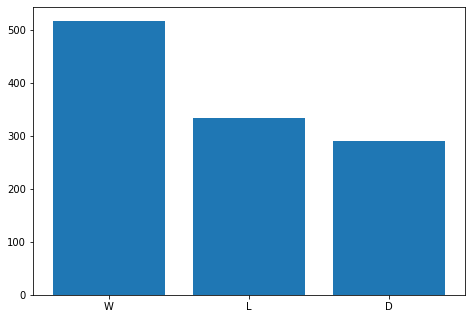

In [8]:
figure = plt.figure()
axis = figure.add_axes([0,0,1,1])
entries = epl['Outcome(Home)'].value_counts()
outcomes = [entries['W'],entries['L'],entries['D']]
bot = ['W','L','D']
plt.bar(bot,outcomes)

In [9]:
epl['Outcome(Home)'].value_counts()

W    517
L    333
D    290
Name: Outcome(Home), dtype: int64

### Modeling and Evaluation
---


To start out data analytics we created one hot vectors for each home and away team that are present in the dataset. These one hot vectors are represented as "home_oneHot" and "away_oneHot." We then combine these one hot vectors with the concatenate command included in the pandas library in order to create "home_away_oneHot." That way, every team is represented in the one hot vector for both home and away.


In [ ]:
home_oneHot = pd.get_dummies(epl['HomeTeam'], prefix='home')
home_oneHot

In [ ]:
away_oneHot = pd.get_dummies(epl['AwayTeam'], prefix='away')
away_oneHot

In [ ]:
home_away_oneHot = pd.concat([home_oneHot, away_oneHot], axis=1)
home_away_oneHot

Here we combine the one hot vectors with the other variables that are inside our dataframe into the X_total variable. We use this X_total to train the decision tree classifier and to find the accuracy score. The accuracy score we found was about 40.1%. 


In [ ]:
X_total = pd.concat([home_away_oneHot, epl[["Odds_W(Home)", \
"Odds_D", "Odds_L", "HomeRank", "AwayRank", "HomeLastResult", "AwayLastResult"]]], axis = 1)
X_total

In [14]:
y_true = epl['Outcome(Home)']
y_true

0       L
1       D
2       D
3       W
4       W
       ..
1135    W
1136    L
1137    L
1138    W
1139    W
Name: Outcome(Home), Length: 1140, dtype: object

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt_epl = DecisionTreeClassifier()
dt_epl.fit(X_total, y_true)
scores = cross_val_score(dt_epl, X_total, y_true, scoring='accuracy')
scores

array([0.39035088, 0.37280702, 0.42982456, 0.44298246, 0.42982456])

In [16]:
print("The accuracy of predicting on all variables using the Decision Tree model: {}".format(np.mean(scores)))

The accuracy of predicting on all variables using the Decision Tree model: 0.4131578947368421


Here is the start of our Random Forest model implementation.

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=20)
scores = cross_val_score(clf, X_total, y_true, scoring='accuracy')
print("Accuracy: {0:.1f}%".format(np.mean(scores) * 100))

Accuracy: 50.2%


In [20]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
"max_features": [15, 40, 'auto'],
"n_estimators": [200, 300],
"min_samples_leaf": [30, 40, 50],
}
clf = RandomForestClassifier(random_state=14)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_total, y_true)
print("Accuracy: {0:.1f}%".format(grid.best_score_ * 100))
print(grid.best_estimator_)
rf_dt_epl = grid.best_estimator_

Accuracy: 54.2%
RandomForestClassifier(max_features=40, min_samples_leaf=30, n_estimators=300,
                       random_state=14)


When we ran an accuracy score against a Random Forest Classifier (without tuning), we achieved an average accuracy of 50.2%. Upon tuning to find the best estimators, we were able to raise the accuracy score to 54.2%, which is a 4% increase. We encountered a draw-back where the Random Forest Classifier would have increased accuracy if we focused strictly on predicting Wins and Losses and ignored draws, but then that would not be the true accuracy of our predictions, since draws happen all the time. We sacrificed higher accuracy in order to keep the accuracy score true to the data, which is why it sits near 55%. We came upon this finding by trying different combinations of tuning parameters and realized that higher accuracy values tend to be associated with our model not predicting Draws at all, or predicting very few of them. We stuck with a model that generates more evenly-distributed predictions.


Below we include the predictions based on the results from the Random Forest. Our model predicts that there would be a total of 716 Wins, 289 Loses, and 135 Draws for home teams. 


In [21]:
y_true_1 = pd.DataFrame(rf_dt_epl.predict(X_total))
y_true_1.value_counts()

W    716
L    289
D    135
dtype: int64

####Standings on training



Since our model only predicts accuracy of each game outcome, we will construct the standings and check the accuracy of our predicted top-3 and bottom-3 teams for each individual season in our training dataset.

Here we added the predicted result from our model back into the dataframe.

In [ ]:
epl["PredResult"] = y_true_1
epl

(For the sake of simplicity, we manually input the actual top-3 and bottom-3 teams for each season)

In [23]:
top_act_15_16 = pd.array(['Leicester', 'Arsenal', 'Tottenham'], dtype=object)
bottom_act_15_16 = pd.array(['Aston Villa', 'Norwich', 'Newcastle'], dtype=object)

top_act_16_17 = pd.array(['Chelsea', 'Tottenham', 'Man City'], dtype=object)
bottom_act_16_17 = pd.array(['Sunderland', 'Middlesbrough', 'Hull'], dtype=object)

top_act_17_18 = pd.array(['Man City', 'Man United', 'Tottenham'], dtype=object)
bottom_act_17_18 = pd.array(['West Brom', 'Stoke', 'Swansea'], dtype=object)

Here we separate the master dataframe into each individual season. These are marked as 15_16, 16_17, and 17_18 respectively. 


In [24]:
epl_pred_15_16 = epl[(epl['Date'] >= '2015-08-08') & (epl['Date'] <= '2016-05-17')]
epl_pred_16_17 = epl[(epl['Date'] >= '2016-08-13') & (epl['Date'] <= '2017-05-21')]
epl_pred_17_18 = epl[(epl['Date'] >= '2017-08-11') & (epl['Date'] <= '2018-05-13')]

In [25]:
epl_pred_15_16

,Date,HomeTeam,AwayTeam,Outcome(Home),Odds_W(Home),Odds_D,Odds_L,HomeRank,AwayRank,HomeLastResult,AwayLastResult,PredResult
0,2015-08-08,Bournemouth,Aston Villa,L,7.024,3.303,3.748,20,17,0,0,W
1,2015-08-08,Chelsea,Swansea,D,6.697,4.338,8.967,1,8,0,0,W
2,2015-08-08,Everton,Watford,D,6.842,3.514,4.852,11,20,0,0,W
3,2015-08-08,Leicester,Sunderland,W,7.000,3.207,3.742,14,16,0,0,W
4,2015-08-08,Man United,Tottenham,W,6.477,3.651,5.318,4,5,0,0,W
...,...,...,...,...,...,...,...,...,...,...,...,...
375,2016-05-15,Stoke,West Ham,W,8.666,3.537,2.307,9,12,-1,0,L
376,2016-05-15,Swansea,Man City,D,10.855,4.778,2.028,8,2,0,1,L
377,2016-05-15,Watford,Sunderland,D,7.645,3.465,3.429,20,16,1,1,W
378,2016-05-15,West Brom,Liverpool,D,7.907,3.385,2.866,13,6,-1,-1,D


The below code constructs the predicted top 3 and bottom 3 teams in the 15_16 season. We took the liberty of commenting in the code to make it easier to read.

In [26]:
#create empty dataframe with W, D, L for each team in the season
epl_pred_standings_15_16 = pd.DataFrame(index=epl_pred_15_16['HomeTeam'].unique(), columns=['W', 'D', 'L']).fillna(0)
for team in epl_pred_15_16['HomeTeam'].unique():
  #add every W, D, L of each team at home to the standings dataframe
  epl_pred_standings_15_16.loc[team]['W'] = len(epl_pred_15_16[(epl_pred_15_16['HomeTeam'] == team) & (epl_pred_15_16['PredResult'] == 'W')])
  epl_pred_standings_15_16.loc[team]['L'] = len(epl_pred_15_16[(epl_pred_15_16['HomeTeam'] == team) & (epl_pred_15_16['PredResult'] == 'L')])
  epl_pred_standings_15_16.loc[team]['D'] = len(epl_pred_15_16[(epl_pred_15_16['HomeTeam'] == team) & (epl_pred_15_16['PredResult'] == 'D')])
  #add every W, D, L of the same team playing away to the dataframe
  epl_pred_standings_15_16.loc[team]['W'] = epl_pred_standings_15_16.loc[team]['W'] + len(epl_pred_15_16[(epl_pred_15_16['AwayTeam'] == team) & (epl_pred_15_16['PredResult'] == 'L')])
  epl_pred_standings_15_16.loc[team]['L'] = epl_pred_standings_15_16.loc[team]['L'] + len(epl_pred_15_16[(epl_pred_15_16['AwayTeam'] == team) & (epl_pred_15_16['PredResult'] == 'W')])
  epl_pred_standings_15_16.loc[team]['D'] = epl_pred_standings_15_16.loc[team]['D'] + len(epl_pred_15_16[(epl_pred_15_16['AwayTeam'] == team) & (epl_pred_15_16['PredResult'] == 'D')])
#calculate the end-of-season points for each team based on formula
epl_pred_standings_15_16['Points'] = epl_pred_standings_15_16.apply(lambda row: 3*row.W + row.D + 0*row.L, axis=1)

#In real life, no teams will be tied at the number of points in a season as there are multiple tiebreakers such as number of goals scored
#and so on. However, our dataset does not contain the necessary tiebreaker data. In order to not penalize our model accuracy, the following
#code creates a list of the teams with the top number of points including equal values. For example, if there are 5 teams tied for the top
#amount of points, our list will contain all of them. Conversely, if the second and third rated teams are tied, the list will not include
#the fourth highest, as there is a clear delineation of the top-3 teams. 
s = epl_pred_standings_15_16['Points'].drop_duplicates().nlargest(1)
top_pred_15_16 = epl_pred_standings_15_16[epl_pred_standings_15_16['Points'].isin(s)]
if len(top_pred_15_16) < 3:
  s = epl_pred_standings_15_16['Points'].drop_duplicates().nlargest(2)
  top_pred_15_16 = epl_pred_standings_15_16[epl_pred_standings_15_16['Points'].isin(s)]
  if len(top_pred_15_16) < 3:
    s = epl_pred_standings_15_16['Points'].drop_duplicates().nlargest(3)
    top_pred_15_16 = epl_pred_standings_15_16[epl_pred_standings_15_16['Points'].isin(s)]
top_pred_15_16 = top_pred_15_16.sort_values(by='Points', ascending=False)
top_pred_15_16 = top_pred_15_16.index.array

#same as above
s = epl_pred_standings_15_16['Points'].drop_duplicates().nsmallest(1)
bottom_pred_15_16 = epl_pred_standings_15_16[epl_pred_standings_15_16['Points'].isin(s)]
if len(bottom_pred_15_16) < 3:
  s = epl_pred_standings_15_16['Points'].drop_duplicates().nsmallest(2)
  bottom_pred_15_16 = epl_pred_standings_15_16[epl_pred_standings_15_16['Points'].isin(s)]
  if len(bottom_pred_15_16) < 3:
    s = epl_pred_standings_15_16['Points'].drop_duplicates().nsmallest(3)
    bottom_pred_15_16 = epl_pred_standings_15_16[epl_pred_standings_15_16['Points'].isin(s)]
bottom_pred_15_16 = bottom_pred_15_16.sort_values(by='Points', ascending=False)
bottom_pred_15_16 = bottom_pred_15_16.index.array


In [27]:
#checks if the actual top-3 teams are present in our predicted top-3 array and constructs T/F vector
top_15_16_accuracy = np.isin(top_act_15_16, top_pred_15_16)
top_15_16_accuracy

#same as above
bottom_15_16_accuracy = np.isin(bottom_act_15_16, bottom_pred_15_16)
bottom_15_16_accuracy

total_15_16_accuracy=np.concatenate((top_15_16_accuracy, bottom_15_16_accuracy))
total_15_16_accuracy

#final accuracy for season
np.count_nonzero(total_15_16_accuracy == True)/len(total_15_16_accuracy)

0.3333333333333333

The final accuracy score for the 15_16 season came out to be 33.3%.


Below we are doing the same calculations as above, but for the 16_17 season. We did not comment the below code for redundancy purposes

In [29]:
epl_pred_standings_16_17 = pd.DataFrame(index=epl_pred_16_17['HomeTeam'].unique(), columns=['W', 'D', 'L']).fillna(0)
for team in epl_pred_16_17['HomeTeam'].unique():
  epl_pred_standings_16_17.loc[team]['W'] = len(epl_pred_16_17[(epl_pred_16_17['HomeTeam'] == team) & (epl_pred_16_17['PredResult'] == 'W')])
  epl_pred_standings_16_17.loc[team]['L'] = len(epl_pred_16_17[(epl_pred_16_17['HomeTeam'] == team) & (epl_pred_16_17['PredResult'] == 'L')])
  epl_pred_standings_16_17.loc[team]['D'] = len(epl_pred_16_17[(epl_pred_16_17['HomeTeam'] == team) & (epl_pred_16_17['PredResult'] == 'D')])
  epl_pred_standings_16_17.loc[team]['W'] = epl_pred_standings_16_17.loc[team]['W'] + len(epl_pred_16_17[(epl_pred_16_17['AwayTeam'] == team) & (epl_pred_16_17['PredResult'] == 'L')])
  epl_pred_standings_16_17.loc[team]['L'] = epl_pred_standings_16_17.loc[team]['L'] + len(epl_pred_16_17[(epl_pred_16_17['AwayTeam'] == team) & (epl_pred_16_17['PredResult'] == 'W')])
  epl_pred_standings_16_17.loc[team]['D'] = epl_pred_standings_16_17.loc[team]['D'] + len(epl_pred_16_17[(epl_pred_16_17['AwayTeam'] == team) & (epl_pred_16_17['PredResult'] == 'D')])
epl_pred_standings_16_17['Points'] = epl_pred_standings_16_17.apply(lambda row: 3*row.W + row.D + 0*row.L, axis=1)

s = epl_pred_standings_16_17['Points'].drop_duplicates().nlargest(1)
top_pred_16_17 = epl_pred_standings_16_17[epl_pred_standings_16_17['Points'].isin(s)]
if len(top_pred_16_17) < 3:
  s = epl_pred_standings_16_17['Points'].drop_duplicates().nlargest(2)
  top_pred_16_17 = epl_pred_standings_16_17[epl_pred_standings_16_17['Points'].isin(s)]
  if len(top_pred_16_17) < 3:
    s = epl_pred_standings_16_17['Points'].drop_duplicates().nlargest(3)
    top_pred_16_17 = epl_pred_standings_16_17[epl_pred_standings_16_17['Points'].isin(s)]
top_pred_16_17 = top_pred_16_17.sort_values(by='Points', ascending=False)
top_pred_16_17 = top_pred_16_17.index.array
print(top_pred_16_17)

s = epl_pred_standings_16_17['Points'].drop_duplicates().nsmallest(1)
bottom_pred_16_17 = epl_pred_standings_16_17[epl_pred_standings_16_17['Points'].isin(s)]
if len(bottom_pred_16_17) < 3:
  s = epl_pred_standings_16_17['Points'].drop_duplicates().nsmallest(2)
  bottom_pred_16_17 = epl_pred_standings_16_17[epl_pred_standings_16_17['Points'].isin(s)]
  if len(bottom_pred_16_17) < 3:
    s = epl_pred_standings_16_17['Points'].drop_duplicates().nsmallest(3)
    bottom_pred_16_17 = epl_pred_standings_16_17[epl_pred_standings_16_17['Points'].isin(s)]
bottom_pred_16_17 = bottom_pred_16_17.sort_values(by='Points', ascending=False)
bottom_pred_16_17 = bottom_pred_16_17.index.array
print(bottom_pred_16_17)

<PandasArray>
['Man City', 'Chelsea', 'Liverpool']
Length: 3, dtype: object
<PandasArray>
['Hull', 'Burnley', 'Sunderland']
Length: 3, dtype: object


In [30]:
top_16_17_accuracy = np.isin(top_act_16_17, top_pred_16_17)
top_16_17_accuracy

bottom_16_17_accuracy = np.isin(bottom_act_16_17, bottom_pred_16_17)
bottom_16_17_accuracy

total_16_17_accuracy=np.concatenate((top_16_17_accuracy, bottom_16_17_accuracy))
total_16_17_accuracy

np.count_nonzero(total_16_17_accuracy == True)/len(total_16_17_accuracy)

0.6666666666666666

The accuracy score for the 16_17 season was 66% which is much better than the 15_16 season.

In [31]:
epl_pred_standings_17_18 = pd.DataFrame(index=epl_pred_17_18['HomeTeam'].unique(), columns=['W', 'D', 'L']).fillna(0)
for team in epl_pred_17_18['HomeTeam'].unique():
  epl_pred_standings_17_18.loc[team]['W'] = len(epl_pred_17_18[(epl_pred_17_18['HomeTeam'] == team) & (epl_pred_17_18['PredResult'] == 'W')])
  epl_pred_standings_17_18.loc[team]['L'] = len(epl_pred_17_18[(epl_pred_17_18['HomeTeam'] == team) & (epl_pred_17_18['PredResult'] == 'L')])
  epl_pred_standings_17_18.loc[team]['D'] = len(epl_pred_17_18[(epl_pred_17_18['HomeTeam'] == team) & (epl_pred_17_18['PredResult'] == 'D')])
  epl_pred_standings_17_18.loc[team]['W'] = epl_pred_standings_17_18.loc[team]['W'] + len(epl_pred_17_18[(epl_pred_17_18['AwayTeam'] == team) & (epl_pred_17_18['PredResult'] == 'L')])
  epl_pred_standings_17_18.loc[team]['L'] = epl_pred_standings_17_18.loc[team]['L'] + len(epl_pred_17_18[(epl_pred_17_18['AwayTeam'] == team) & (epl_pred_17_18['PredResult'] == 'W')])
  epl_pred_standings_17_18.loc[team]['D'] = epl_pred_standings_17_18.loc[team]['D'] + len(epl_pred_17_18[(epl_pred_17_18['AwayTeam'] == team) & (epl_pred_17_18['PredResult'] == 'D')])
epl_pred_standings_17_18['Points'] = epl_pred_standings_17_18.apply(lambda row: 3*row.W + row.D + 0*row.L, axis=1)

s = epl_pred_standings_17_18['Points'].drop_duplicates().nlargest(1)
top_pred_17_18 = epl_pred_standings_17_18[epl_pred_standings_17_18['Points'].isin(s)]
if len(top_pred_17_18) < 3:
  s = epl_pred_standings_17_18['Points'].drop_duplicates().nlargest(2)
  top_pred_17_18 = epl_pred_standings_17_18[epl_pred_standings_17_18['Points'].isin(s)]
  if len(top_pred_17_18) < 3:
    s = epl_pred_standings_17_18['Points'].drop_duplicates().nlargest(3)
    top_pred_17_18 = epl_pred_standings_17_18[epl_pred_standings_17_18['Points'].isin(s)]
top_pred_17_18 = top_pred_17_18.sort_values(by='Points', ascending=False)
top_pred_17_18 = top_pred_17_18.index.array
print(top_pred_17_18)

s = epl_pred_standings_17_18['Points'].drop_duplicates().nsmallest(1)
bottom_pred_17_18 = epl_pred_standings_17_18[epl_pred_standings_17_18['Points'].isin(s)]
if len(bottom_pred_17_18) < 3:
  s = epl_pred_standings_17_18['Points'].drop_duplicates().nsmallest(2)
  bottom_pred_17_18 = epl_pred_standings_17_18[epl_pred_standings_17_18['Points'].isin(s)]
  if len(bottom_pred_17_18) < 3:
    s = epl_pred_standings_17_18['Points'].drop_duplicates().nsmallest(3)
    bottom_pred_17_18 = epl_pred_standings_17_18[epl_pred_standings_17_18['Points'].isin(s)]
bottom_pred_17_18 = bottom_pred_17_18.sort_values(by='Points', ascending=False)
bottom_pred_17_18 = bottom_pred_17_18.index.array
print(bottom_pred_17_18)

<PandasArray>
['Man City', 'Chelsea', 'Liverpool']
Length: 3, dtype: object
<PandasArray>
['West Brom', 'Brighton', 'Huddersfield']
Length: 3, dtype: object


In [32]:
top_17_18_accuracy = np.isin(top_act_17_18, top_pred_17_18)
top_17_18_accuracy

bottom_17_18_accuracy = np.isin(bottom_act_17_18, bottom_pred_17_18)
bottom_17_18_accuracy

total_17_18_accuracy=np.concatenate((top_17_18_accuracy, bottom_17_18_accuracy))
total_17_18_accuracy

np.count_nonzero(total_17_18_accuracy == True)/len(total_17_18_accuracy)

0.3333333333333333

For the 17_18 season we got a accuracy score of 33%.

Below we calculate the average accuracy for every season in the trianing data. This turned out to be 44% accuracy.


In [33]:
total_training_accuracy = np.concatenate((total_15_16_accuracy, total_16_17_accuracy, total_17_18_accuracy))
np.count_nonzero(total_training_accuracy == True)/len(total_training_accuracy)

0.4444444444444444

####Testing

In [ ]:
files.upload()

In [ ]:
epl_pred = pd.read_csv('PL_test_2.csv', parse_dates=["Date"])
epl_pred

In [ ]:
epl_pred.columns = ["Date", "HomeTeam", "AwayTeam", "Outcome(Home)", \
"Odds_W(Home)", "Odds_D", "Odds_L", "HomeRank", "AwayRank", "HomeLastResult", "AwayLastResult"]
epl_pred.head()

In [37]:
y_test_act = epl_pred['Outcome(Home)']
y_test_act.value_counts()

W    181
L    128
D     71
Name: Outcome(Home), dtype: int64

In [ ]:
epl_pred


Here we compile the actual end-of-season standings and the top and bottom teams for our testing data.

In [ ]:
epl_test_standings = pd.DataFrame(index=epl_pred['HomeTeam'].unique(), columns=['W', 'D', 'L']).fillna(0)
epl_test_standings

In [ ]:
for team in epl_pred['HomeTeam'].unique():
  epl_test_standings.loc[team]['W'] = len(epl_pred[(epl_pred['HomeTeam'] == team) & (epl_pred['Outcome(Home)'] == 'W')])
  epl_test_standings.loc[team]['L'] = len(epl_pred[(epl_pred['HomeTeam'] == team) & (epl_pred['Outcome(Home)'] == 'L')])
  epl_test_standings.loc[team]['D'] = len(epl_pred[(epl_pred['HomeTeam'] == team) & (epl_pred['Outcome(Home)'] == 'D')])
  epl_test_standings.loc[team]['W'] = epl_test_standings.loc[team]['W'] + len(epl_pred[(epl_pred['AwayTeam'] == team) & (epl_pred['Outcome(Home)'] == 'L')])
  epl_test_standings.loc[team]['L'] = epl_test_standings.loc[team]['L'] + len(epl_pred[(epl_pred['AwayTeam'] == team) & (epl_pred['Outcome(Home)'] == 'W')])
  epl_test_standings.loc[team]['D'] = epl_test_standings.loc[team]['D'] + len(epl_pred[(epl_pred['AwayTeam'] == team) & (epl_pred['Outcome(Home)'] == 'D')])
epl_test_standings.sort_index()

In [ ]:
epl_test_standings['Points'] = epl_test_standings.apply(lambda row: 3*row.W + row.D + 0*row.L, axis=1)
epl_test_standings.sort_values(by=['Points'], ascending=False)

In [42]:
top_act = epl_test_standings.nlargest(3, 'Points')
top_act

,W,D,L,Points
Man City,32,2,4,98
Liverpool,30,7,1,97
Chelsea,21,9,8,72


In [43]:
bottom_act = epl_test_standings.nsmallest(3, 'Points')
bottom_act

,W,D,L,Points
Huddersfield,3,7,28,16
Fulham,7,5,26,26
Cardiff,10,4,24,34


We are now preparing the data in such a way as to predict the outcome of each game for the testing dataset using our tuned Random Forrest classifier, similar to what we did for the training data.

In [44]:
epl_pred = epl_pred.drop(columns="Outcome(Home)")

In [ ]:
home_oneHot_test = pd.get_dummies(epl_pred['HomeTeam'], prefix='home')
home_oneHot_test

In [ ]:
away_oneHot_test = pd.get_dummies(epl_pred['AwayTeam'], prefix='away')
away_oneHot_test

In [ ]:
home_away_oneHot_test = pd.concat([home_oneHot_test, away_oneHot_test], axis=1)
home_away_oneHot_test

In [ ]:
X_test = pd.concat([home_away_oneHot_test, epl_pred[["Odds_W(Home)", \
"Odds_D", "Odds_L", "HomeRank", "AwayRank", "HomeLastResult", "AwayLastResult"]]], axis = 1)
X_test = X_test.reindex(labels=X_total.columns, axis=1)
X_test

In [ ]:
X_test = X_test.fillna(0)
X_test

In [ ]:
y_pred = rf_dt_epl.predict(X_test)
y_pred = pd.DataFrame(y_pred)[0]
y_pred

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test_act)

0.5921052631578947

In [52]:
epl_pred["PredResult(Home)"] = y_pred
epl_pred["PredResult(Home)"].value_counts()

W    233
L    147
Name: PredResult(Home), dtype: int64

In [ ]:
epl_pred

Here we compile the predicted end-of-season standings for our testing data.

In [ ]:
standings = pd.DataFrame(index=epl_pred['HomeTeam'].unique(), columns=['W', 'D', 'L']).fillna(0)
standings

In [ ]:
for team in epl_pred['HomeTeam'].unique():
  standings.loc[team]['W'] = len(epl_pred[(epl_pred['HomeTeam'] == team) & (epl_pred['PredResult(Home)'] == 'W')])
  standings.loc[team]['L'] = len(epl_pred[(epl_pred['HomeTeam'] == team) & (epl_pred['PredResult(Home)'] == 'L')])
  standings.loc[team]['D'] = len(epl_pred[(epl_pred['HomeTeam'] == team) & (epl_pred['PredResult(Home)'] == 'D')])
  standings.loc[team]['W'] = standings.loc[team]['W'] + len(epl_pred[(epl_pred['AwayTeam'] == team) & (epl_pred['PredResult(Home)'] == 'L')])
  standings.loc[team]['L'] = standings.loc[team]['L'] + len(epl_pred[(epl_pred['AwayTeam'] == team) & (epl_pred['PredResult(Home)'] == 'W')])
  standings.loc[team]['D'] = standings.loc[team]['D'] + len(epl_pred[(epl_pred['AwayTeam'] == team) & (epl_pred['PredResult(Home)'] == 'D')])
standings.sort_index()

In [ ]:
standings['Points'] = standings.apply(lambda row: 3*row.W + row.D + 0*row.L, axis=1)
standings.sort_values(by=['Points'], ascending=False)

In [ ]:
s = standings['Points'].drop_duplicates().nlargest(1)
top = standings[standings['Points'].isin(s)]
if len(top) < 3:
  s = standings['Points'].drop_duplicates().nlargest(2)
  top = standings[standings['Points'].isin(s)]
  if len(top) < 3:
    s = standings['Points'].drop_duplicates().nlargest(3)
    top = standings[standings['Points'].isin(s)]
top = top.sort_values(by='Points', ascending=False)
top

In [ ]:
s = standings['Points'].drop_duplicates().nsmallest(1)
bottom = standings[standings['Points'].isin(s)]
if len(bottom) < 3:
  s = standings['Points'].drop_duplicates().nsmallest(2)
  bottom = standings[standings['Points'].isin(s)]
  if len(bottom) < 3:
    s = standings['Points'].drop_duplicates().nsmallest(3)
    bottom = standings[standings['Points'].isin(s)]
bottom = bottom.sort_values(by='Points', ascending=False)
bottom

In [59]:
top_act = top_act.index.array
bottom_act = bottom_act.index.array

In [60]:
top = top.index.array
bottom = bottom.index.array

In [61]:
top_accuracy = np.isin(top_act, top)
top_accuracy

array([ True,  True,  True])

In [62]:
bottom_accuracy = np.isin(bottom_act, bottom)
bottom_accuracy

array([ True,  True,  True])

In [63]:
total_accuracy=np.concatenate((top_accuracy, bottom_accuracy))
total_accuracy

array([ True,  True,  True,  True,  True,  True])

In [64]:
np.count_nonzero(total_accuracy == True)/len(total_accuracy)

1.0